# Exploratory Data Analysis - Susenas 2012

Created by: Kartika Rizqi Nastiti

# 1. Preliminaries

Susenas (Survei Ekonomi Nasional) adalah survei yang dilakukan dengan tujuan untuk mengumpulkan data terkait kondisi sosial ekonomi masyarakat, meliputi kondisi kesehatan, pendidikan, fertilitas, KB, perumahan, dan konsumsi rumah tangga. Susenas dilakukan pertama kali di tahun 1963 dan mulai dibagi menjadi Kor dan Modul sejak 1992. Sejak 2011, Susenas mulai dilakukan lebih dari sekali per tahunnya.

### Import librarires

In [263]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

### Import data

Pada notebook ini dilakukan explorasi analisis data Susenas 2012, khususnya di isu pendidikan. Susenas sendiri untuk modul Kor, terdiri dari 2 bagian yaitu Kor Individu dan Kor Rumah Tangga.

In [264]:
# Susenas 2012
sus12_ki = pd.read_csv('../susenas12/sn12_ki.csv')
sus12_kr = pd.read_csv('../susenas12/sn12_krt.csv')

In [265]:
sus12_ki

,URUT,B1R1,B1R2,B1R5,B1R8,NART,HB,JK,UMUR,KWN,...,B5R34C2,B5R34C3,B5R35,B5R36,B5R37,B5R38,B5R38L,KABU,EXP_CAP,WEIND
0,110112500101601,11,1,1,1,1,1,1,41,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,3.434643e+05,45.876255
1,110112500101601,11,1,1,1,2,2,2,30,2,...,0.0,0.0,1.0,4.0,NaN,NaN,NaN,1101,3.434643e+05,45.876255
2,110112500101601,11,1,1,1,3,3,2,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,3.434643e+05,45.876255
3,110112500101601,11,1,1,1,4,3,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,3.434643e+05,45.876255
4,110112500101602,11,1,1,2,1,1,1,35,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,5.703095e+05,55.252186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114440,947122001103810,94,71,2,10,2,2,2,37,2,...,0.0,0.0,3.0,NaN,1.0,NaN,NaN,9471,1.348310e+06,6.000000
1114441,947122001103810,94,71,2,10,3,3,1,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9471,1.348310e+06,6.000000
1114442,947122001103810,94,71,2,10,4,3,2,9,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9471,1.348310e+06,6.000000
1114443,947122001103810,94,71,2,10,5,7,2,46,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9471,1.348310e+06,6.000000


In [266]:
sus12_kr

,URUT,B1R1,B1R2,B1R5,B1R8,B1R11,B2R1,B2R2,B2R3,B2R4,...,B8R2A,B8R2B,B8R2C,B8R3A,B8R3B,B9R1A,B9R1B,KABU,EXP_CAP,WERT
0,110112500101601,11,1,1,1,1,4,1,3,2,...,1,2.0,2.0,2,2,8,2,1101,3.434643e+05,45.876255
1,110112500101602,11,1,1,2,1,4,0,4,2,...,1,2.0,2.0,2,2,18,2,1101,5.703095e+05,55.252186
2,110112500101603,11,1,1,3,1,4,0,4,4,...,1,4.0,4.0,1,1,18,1,1101,1.305774e+06,20.006414
3,110112500101604,11,1,1,4,1,6,2,4,3,...,1,3.0,3.0,2,2,18,1,1101,4.017619e+05,42.398369
4,110112500101605,11,1,1,5,1,4,1,3,2,...,1,1.0,1.0,2,2,1,1,1101,7.000714e+05,43.420265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286108,947122001103806,94,71,2,6,1,5,2,3,3,...,1,3.0,3.0,2,1,18,1,9471,1.648210e+06,438.129364
286109,947122001103807,94,71,2,7,1,5,0,5,4,...,1,5.0,6.0,1,1,18,1,9471,1.959000e+06,321.015991
286110,947122001103808,94,71,2,8,1,2,0,2,2,...,1,2.0,2.0,2,2,13,2,9471,2.233357e+06,324.770111
286111,947122001103809,94,71,2,9,1,7,0,7,6,...,1,5.0,5.0,2,1,1,2,9471,7.117279e+05,14.112268


Karena tujuan weighting adalah untuk menentukan bagaimana data per individu/rumah tangga merepresentasikan data populasi yang relevan, maka total dari seluruh bobot individu (weind) akan kurang lebih sama dengan jumlah populasi Indonesia saat itu

In [267]:
total_pop=sus12_ki['WEIND'].sum()
print('{:,.0f}'.format(total_pop))

245,138,422


Seperti kita lihat di atas, ketika semua total populasi dijumlah, kita mendapatkan proporsi yang kurang lebih setara dengan banyak penduduk Indonesia.

In [268]:
# Creating Count Statistics for Our Datasets
sus12_kr_desc = sus12_kr['URUT'].agg(['count','nunique']).transpose()
sus12_ki_desc = sus12_ki['URUT'].agg(['count','nunique']).transpose()

plot_describe = pd.concat([sus12_ki_desc,sus12_kr_desc],axis=1)
plot_describe.columns=['2012 Individu','2012 Ruta']
lst = list(plot_describe.columns)
for c in lst:
    plot_describe[c] = plot_describe[c].astype(int).apply(lambda x: f'{x:,}')
    
plot_describe

,2012 Individu,2012 Ruta
count,"1,114,445","286,113"
nunique,"286,113","286,113"


# 2. Determine and Clean Dataset (Assessing Determinants of School Participation)

### a. Background

Dalam konteks notebook ini, kita akan melihat dan memvisualisasikan secara sederhana faktor-faktor yang memengaruhi partisipasi sekolah penduduk berusia 5-24 tahun. Rentang usia ini ditentukan berdasarkan peraturan pemerintah terkait wajib belajar 12 tahun untuk pendidikan dasar (SD, SMP, SMK/SMA/MA) yang telah dirintis mulai tahun 2012.

Link berita terkait:
https://edukasi.kompas.com/read/2011/09/27/10335033/Wajib.Belajar.12.Tahun.Dirintis.Mulai.2012#:~:text=JAKARTA%2C%20KOMPAS.com%20%2D%20Pemerintah,terwujudnya%20wajib%20belajar%2012%20tahun.&text=Karena%20itu%2C%20setelah%20biaya%20operasional,wajib%20belajar%2012%20tahun%20terwujud.

Adapun beberapa variabel yang mungkin berpengaruh adalah:

- Umur (hipotesis: penduduk yang lebih muda atau lebih tua, cenderung tidak mengikuti wajib belajar untuk pendidikan dasar)
- Status perkawinan (hipotesis: penduduk dengan status perkawinan "sudah pernah menikah", cenderung tidak mengikuti wajib belajar untuk pendidikan dasar)
- Tempat tinggal (hipotesis: daerah perkotaan lebih banyak dimudahkan mendapatkan akses pendidikan dasar)
- Pendapatan (hipotesis: semakin tinggi pendapatan, semakin mudah mendapatkan akses pendidikan dasar)

### b. Choosing Relevant Variables

Untuk isu partisiasi sekolah, semua variabel yang dibutuhkan ini tersedia di Susenas Kor Individu, sehingga kita tidak memerlukan observasi dari Susenas Kor Rumah Tangga. Variabel yang kita pilih adalah:

- URUT: Variabel kunci (bersifat unique)
- B1R1: Kode Provinsi
- B1R2: Kode Kabupaten
- BIR5: Klasifikasi desa/kelurahan (apakah berstatus daerah perkotaan/pedesaan)
- JK: Jenis kelamin (laki-laki/perempuan)
- UMUR: Umur/usia responden
- KWN: Status perkawinan (belum kawin, kawin, cerai hidup, cerai mati)
- B5R14: Tingkat partisipasi sekolah (tidak/belum pernah bersekolah, masih bersekolah, tidak bersekolah lagi)
- B5R17: Ijazah/STTB tertinggi yang dimiliki
- EXP_CAP: Rata-rata pengeluaran per kapita sebulan
- WEIND: Penimbang penduduk

Di sini juga ditambahkan identifier untuk daerah dari data BPS di tahun 2009.

In [269]:
# Subsetting Dataset to Selected Variables
df_raw = sus12_ki[['URUT','B1R1','B1R2','B1R5','JK','UMUR','KWN','B5R14','B5R17','EXP_CAP','WEIND']]

# Creating District Identifier
df_raw=df_raw.assign(bps_2009=df_raw['B1R1']*100+df_raw['B1R2'])
df_raw

,URUT,B1R1,B1R2,B1R5,JK,UMUR,KWN,B5R14,B5R17,EXP_CAP,WEIND,bps_2009
0,110112500101601,11,1,1,1,41,2,3.0,8.0,3.434643e+05,45.876255,1101
1,110112500101601,11,1,1,2,30,2,3.0,8.0,3.434643e+05,45.876255,1101
2,110112500101601,11,1,1,2,5,1,2.0,1.0,3.434643e+05,45.876255,1101
3,110112500101601,11,1,1,1,0,1,NaN,NaN,3.434643e+05,45.876255,1101
4,110112500101602,11,1,1,1,35,2,3.0,5.0,5.703095e+05,55.252186,1101
...,...,...,...,...,...,...,...,...,...,...,...,...
1114440,947122001103810,94,71,2,2,37,2,2.0,8.0,1.348310e+06,6.000000,9471
1114441,947122001103810,94,71,2,1,10,1,2.0,1.0,1.348310e+06,6.000000,9471
1114442,947122001103810,94,71,2,2,9,1,2.0,1.0,1.348310e+06,6.000000,9471
1114443,947122001103810,94,71,2,2,46,1,3.0,5.0,1.348310e+06,6.000000,9471


### c. Slicing Dataset

Berdasarkan data kuesioner partisipasi sekolah dari Susenas 2012 dengan cakupan pendekatan wajib belajar untuk pendidikan dasar 12 tahun, sampel data pun hanya diambil di rentang usia tersebut.

In [270]:
df_school = df_raw.loc[(df_raw['UMUR']>=5) & (df_raw['UMUR']<=24)]
df_school

,URUT,B1R1,B1R2,B1R5,JK,UMUR,KWN,B5R14,B5R17,EXP_CAP,WEIND,bps_2009
2,110112500101601,11,1,1,2,5,1,2.0,1.0,3.434643e+05,45.876255,1101
6,110112500101602,11,1,1,2,9,1,2.0,1.0,5.703095e+05,55.252186,1101
7,110112500101602,11,1,1,2,5,1,1.0,NaN,5.703095e+05,55.252186,1101
10,110112500101603,11,1,1,1,22,1,2.0,8.0,1.305774e+06,20.006414,1101
11,110112500101603,11,1,1,1,10,1,2.0,1.0,1.305774e+06,20.006414,1101
...,...,...,...,...,...,...,...,...,...,...,...,...
1114437,947122001103809,94,71,2,1,14,1,2.0,2.0,7.117279e+05,14.112268,9471
1114438,947122001103809,94,71,2,1,6,1,2.0,1.0,7.117279e+05,14.112268,9471
1114441,947122001103810,94,71,2,1,10,1,2.0,1.0,1.348310e+06,6.000000,9471
1114442,947122001103810,94,71,2,2,9,1,2.0,1.0,1.348310e+06,6.000000,9471


In [271]:
df_school_desc = df_school['URUT'].agg(['count','nunique']).transpose()
df_school_desc

count      406950
nunique    210244
Name: URUT, dtype: int64

### d. Sanity Check

In [272]:
df_school.describe()

,URUT,B1R1,B1R2,B1R5,JK,UMUR,KWN,B5R14,B5R17,EXP_CAP,WEIND,bps_2009
count,4.069500e+05,406950.000000,406950.000000,406950.000000,406950.000000,406950.000000,406950.000000,406950.000000,368525.000000,4.069500e+05,406950.000000,406950.000000
mean,4.325290e+14,43.031741,21.937245,1.578879,1.485590,13.481492,1.084145,2.150193,3.102598,5.988987e+05,218.299335,4325.111345
std,2.552888e+14,25.555091,26.551718,0.493739,0.499793,5.513846,0.290454,0.562565,2.884781,6.871373e+05,211.199187,2552.883167
min,1.101125e+14,11.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,6.707492e+04,1.000000,1101.000000
25%,1.709220e+14,17.000000,4.000000,1.000000,1.000000,9.000000,1.000000,2.000000,1.000000,2.913691e+05,79.264511,1709.000000
50%,3.513220e+14,35.000000,9.000000,2.000000,1.000000,13.000000,1.000000,2.000000,2.000000,4.308620e+05,141.862350,3513.000000
75%,6.408220e+14,64.000000,24.000000,2.000000,2.000000,18.000000,1.000000,2.000000,5.000000,6.904948e+05,287.013290,6408.000000
max,9.471220e+14,94.000000,79.000000,2.000000,2.000000,24.000000,4.000000,3.000000,15.000000,7.529981e+07,3151.935791,9471.000000


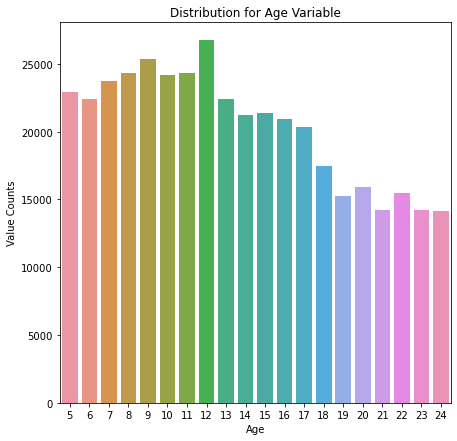

In [273]:
# Histogram for Age Variable

age_plot = sns.barplot(x=df_school.UMUR.value_counts().index,
            y=df_school.UMUR.value_counts())
age_plot.set_title('Distribution for Age Variable')
age_plot.set(xlabel='Age', ylabel='Value Counts')
plt.show()

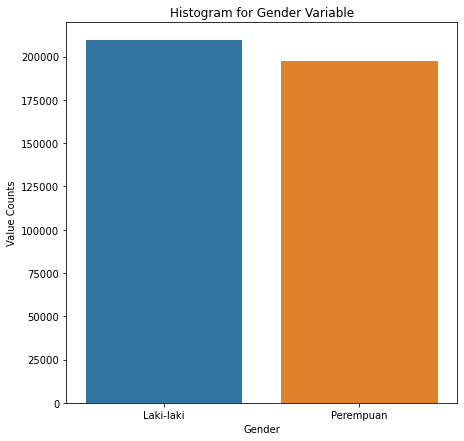

In [274]:
# Histogram for Gender Variable

df_gender = df_school.copy()
df_gender['JK'] = df_gender['JK'].map({1:'Laki-laki', 2:'Perempuan'}) 

gender_plot = sns.barplot(x=df_gender.JK.value_counts().index,
            y=df_gender.JK.value_counts())

gender_plot.set_title('Histogram for Gender Variable')
gender_plot.set(xlabel='Gender', ylabel='Value Counts')
plt.show()

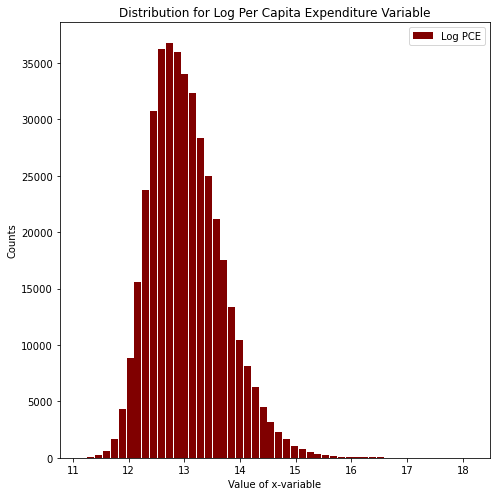

In [275]:
# Histogram for Log Expenditure per Capita Variable

df_school = df_school.assign(log_exp_cap=np.log(df_school['EXP_CAP']))
plot_exp = df_school['log_exp_cap']

plot_exp.plot.hist(grid=False, bins=50, rwidth=0.9,color='maroon',label='Log PCE')
plt.title('Distribution for Log Per Capita Expenditure Variable')
plt.xlabel('Value of x-variable')
plt.ylabel('Counts')
plt.legend(loc="best")
plt.tight_layout()
plt.rcParams['figure.figsize'] = [10, 4]
plt.show()

### e. Cleaning process

#### Mengganti nama kolom agar lebih representatif dan memudahkan proses analisis selanjutnya.

In [276]:
df_school

,URUT,B1R1,B1R2,B1R5,JK,UMUR,KWN,B5R14,B5R17,EXP_CAP,WEIND,bps_2009,log_exp_cap
2,110112500101601,11,1,1,2,5,1,2.0,1.0,3.434643e+05,45.876255,1101,12.746838
6,110112500101602,11,1,1,2,9,1,2.0,1.0,5.703095e+05,55.252186,1101,13.253935
7,110112500101602,11,1,1,2,5,1,1.0,NaN,5.703095e+05,55.252186,1101,13.253935
10,110112500101603,11,1,1,1,22,1,2.0,8.0,1.305774e+06,20.006414,1101,14.082306
11,110112500101603,11,1,1,1,10,1,2.0,1.0,1.305774e+06,20.006414,1101,14.082306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114437,947122001103809,94,71,2,1,14,1,2.0,2.0,7.117279e+05,14.112268,9471,13.475451
1114438,947122001103809,94,71,2,1,6,1,2.0,1.0,7.117279e+05,14.112268,9471,13.475451
1114441,947122001103810,94,71,2,1,10,1,2.0,1.0,1.348310e+06,6.000000,9471,14.114362
1114442,947122001103810,94,71,2,2,9,1,2.0,1.0,1.348310e+06,6.000000,9471,14.114362


In [277]:
df_school = df_school.rename(columns = {'B1R1': 'Kode Provinsi', 'B1R2': 'Kode Kab/Kota',
                                       'B1R5': 'Klasifikasi Kab/Kota', 'JK': 'Jenis Kelamin',
                                       'KWN': 'Status Perkawinan', 'B5R14': 'Partisipasi Sekolah',
                                       'B5R17': 'Ijazah/STTB Tertinggi', 'EXP_CAP': 'Expenditure Capital'}, inplace = False)

In [278]:
df_school

,URUT,Kode Provinsi,Kode Kab/Kota,Klasifikasi Kab/Kota,Jenis Kelamin,UMUR,Status Perkawinan,Partisipasi Sekolah,Ijazah/STTB Tertinggi,Expenditure Capital,WEIND,bps_2009,log_exp_cap
2,110112500101601,11,1,1,2,5,1,2.0,1.0,3.434643e+05,45.876255,1101,12.746838
6,110112500101602,11,1,1,2,9,1,2.0,1.0,5.703095e+05,55.252186,1101,13.253935
7,110112500101602,11,1,1,2,5,1,1.0,NaN,5.703095e+05,55.252186,1101,13.253935
10,110112500101603,11,1,1,1,22,1,2.0,8.0,1.305774e+06,20.006414,1101,14.082306
11,110112500101603,11,1,1,1,10,1,2.0,1.0,1.305774e+06,20.006414,1101,14.082306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114437,947122001103809,94,71,2,1,14,1,2.0,2.0,7.117279e+05,14.112268,9471,13.475451
1114438,947122001103809,94,71,2,1,6,1,2.0,1.0,7.117279e+05,14.112268,9471,13.475451
1114441,947122001103810,94,71,2,1,10,1,2.0,1.0,1.348310e+06,6.000000,9471,14.114362
1114442,947122001103810,94,71,2,2,9,1,2.0,1.0,1.348310e+06,6.000000,9471,14.114362


#### Cek persentase missing value

In [279]:
percent_missing = df_school.isnull().sum() * 100 / len(df_school)
missing_value_df = pd.DataFrame({'column_name': df_school.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
URUT,URUT,0.000000
Kode Provinsi,Kode Provinsi,0.000000
Kode Kab/Kota,Kode Kab/Kota,0.000000
Klasifikasi Kab/Kota,Klasifikasi Kab/Kota,0.000000
Jenis Kelamin,Jenis Kelamin,0.000000
UMUR,UMUR,0.000000
Status Perkawinan,Status Perkawinan,0.000000
Partisipasi Sekolah,Partisipasi Sekolah,0.000000
Ijazah/STTB Tertinggi,Ijazah/STTB Tertinggi,9.442192
Expenditure Capital,Expenditure Capital,0.000000


#### Konversi ijazah/STTB tertinggi ke jumlah tahun

In [280]:
# Education Certification

certif = [(df_school['Ijazah/STTB Tertinggi']==np.nan),(df_school['Ijazah/STTB Tertinggi']==1), 
          (df_school['Ijazah/STTB Tertinggi']==2), (df_school['Ijazah/STTB Tertinggi']==3),
          (df_school['Ijazah/STTB Tertinggi']==4), (df_school['Ijazah/STTB Tertinggi']==5), 
          (df_school['Ijazah/STTB Tertinggi']==6), (df_school['Ijazah/STTB Tertinggi']==7), 
          (df_school['Ijazah/STTB Tertinggi']==8), (df_school['Ijazah/STTB Tertinggi']==9),
          (df_school['Ijazah/STTB Tertinggi']==10), (df_school['Ijazah/STTB Tertinggi']==11), 
          (df_school['Ijazah/STTB Tertinggi']==12), (df_school['Ijazah/STTB Tertinggi']==13), 
          (df_school['Ijazah/STTB Tertinggi']==14), (df_school['Ijazah/STTB Tertinggi']==15)]

yofs = [0,3,6,6,6,9,9,9,12,12,12,12,14,15,16,18]

df_school['yrs_school']=np.select(certif,yofs)

In [281]:
df_sliced = df_school

In [282]:
df_sliced

,URUT,Kode Provinsi,Kode Kab/Kota,Klasifikasi Kab/Kota,Jenis Kelamin,UMUR,Status Perkawinan,Partisipasi Sekolah,Ijazah/STTB Tertinggi,Expenditure Capital,WEIND,bps_2009,log_exp_cap,yrs_school
2,110112500101601,11,1,1,2,5,1,2.0,1.0,3.434643e+05,45.876255,1101,12.746838,3
6,110112500101602,11,1,1,2,9,1,2.0,1.0,5.703095e+05,55.252186,1101,13.253935,3
7,110112500101602,11,1,1,2,5,1,1.0,NaN,5.703095e+05,55.252186,1101,13.253935,0
10,110112500101603,11,1,1,1,22,1,2.0,8.0,1.305774e+06,20.006414,1101,14.082306,12
11,110112500101603,11,1,1,1,10,1,2.0,1.0,1.305774e+06,20.006414,1101,14.082306,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114437,947122001103809,94,71,2,1,14,1,2.0,2.0,7.117279e+05,14.112268,9471,13.475451,6
1114438,947122001103809,94,71,2,1,6,1,2.0,1.0,7.117279e+05,14.112268,9471,13.475451,3
1114441,947122001103810,94,71,2,1,10,1,2.0,1.0,1.348310e+06,6.000000,9471,14.114362,3
1114442,947122001103810,94,71,2,2,9,1,2.0,1.0,1.348310e+06,6.000000,9471,14.114362,3


#### Modifikasi dataset untuk mengindikasi partisipasi sekolah dan variabel lainnya

In [283]:
# Create Dataset to Indicate School Participation

df_sliced.loc[df_sliced['Partisipasi Sekolah']==1,'Partisipasi Sekolah']=0
df_sliced.loc[df_sliced['Partisipasi Sekolah']==2,'Partisipasi Sekolah']=1
df_sliced.loc[df_sliced['Partisipasi Sekolah']==3,'Partisipasi Sekolah']=0

## Create Status Variable ##

# Urban Status Variable

df_sliced.loc[df_sliced['Klasifikasi Kab/Kota']==1,'Klasifikasi Kab/Kota']=1
df_sliced.loc[df_sliced['Klasifikasi Kab/Kota']==2,'Klasifikasi Kab/Kota']=0

# Marital Status Variable

df_sliced.loc[df_sliced['Status Perkawinan']==1,'Status Perkawinan']=0
df_sliced.loc[df_sliced['Status Perkawinan']==2,'Status Perkawinan']=1
df_sliced.loc[df_sliced['Status Perkawinan']==3,'Status Perkawinan']=1
df_sliced.loc[df_sliced['Status Perkawinan']==4,'Status Perkawinan']=1

# Making Some Variable as Integer

lst2 = ['yrs_school','Partisipasi Sekolah','Klasifikasi Kab/Kota','Status Perkawinan']
for c in lst2:
    df_sliced[c] = df_sliced[c].astype(int)

# # Creating Log PCE Data
# df_sliced=df_sliced.assign(log_exp_cap=np.log(df_sliced['EXP_CAP']))

df_sliced

,URUT,Kode Provinsi,Kode Kab/Kota,Klasifikasi Kab/Kota,Jenis Kelamin,UMUR,Status Perkawinan,Partisipasi Sekolah,Ijazah/STTB Tertinggi,Expenditure Capital,WEIND,bps_2009,log_exp_cap,yrs_school
2,110112500101601,11,1,1,2,5,0,1,1.0,3.434643e+05,45.876255,1101,12.746838,3
6,110112500101602,11,1,1,2,9,0,1,1.0,5.703095e+05,55.252186,1101,13.253935,3
7,110112500101602,11,1,1,2,5,0,0,NaN,5.703095e+05,55.252186,1101,13.253935,0
10,110112500101603,11,1,1,1,22,0,1,8.0,1.305774e+06,20.006414,1101,14.082306,12
11,110112500101603,11,1,1,1,10,0,1,1.0,1.305774e+06,20.006414,1101,14.082306,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114437,947122001103809,94,71,0,1,14,0,1,2.0,7.117279e+05,14.112268,9471,13.475451,6
1114438,947122001103809,94,71,0,1,6,0,1,1.0,7.117279e+05,14.112268,9471,13.475451,3
1114441,947122001103810,94,71,0,1,10,0,1,1.0,1.348310e+06,6.000000,9471,14.114362,3
1114442,947122001103810,94,71,0,2,9,0,1,1.0,1.348310e+06,6.000000,9471,14.114362,3


### f. Collapsing to District Level

In [284]:
# Creating Lambda Function for Weighted Average and Weighted Sum
wt_mean = lambda x: np.average(x, weights=df_sliced.loc[x.index, "WEIND"])
wt_sum = lambda x: np.sum(x, weights=df_sliced.loc[x.index, "WEIND"])
wt_mean_annex = lambda x: np.average(x, weights=df_school.loc[x.index, "WEIND"])

# Creating Collapsed Dataframe
df_group = df_sliced.groupby("bps_2009").agg(EXP_CAP=("Expenditure Capital",wt_mean),
                                              urban=("Klasifikasi Kab/Kota",wt_mean),
                                              school_participation=("Partisipasi Sekolah",wt_mean),
                                              married=("Status Perkawinan",wt_mean),
                                              WEIND=("WEIND","sum"))

# Mean Age (Processed Differently)
df_grouped_annex = df_school.groupby("bps_2009").agg(UMUR=("UMUR",wt_mean_annex))

# Creating Log Expenditure per Capita
df_group=df_group.assign(log_exp_cap=np.log(df_group['EXP_CAP']))

# Merging Both

df_grouped=pd.concat([df_group,df_grouped_annex],axis=1)
df_grouped.head()

,EXP_CAP,urban,school_participation,married,WEIND,log_exp_cap,UMUR
bps_2009,,,,,,,
1101,429342.987594,0.183268,0.731941,0.055721,32795.506702,12.970011,12.889175
1102,481158.536117,0.245419,0.664332,0.050608,46773.590671,13.083952,13.354478
1103,467488.602571,0.152304,0.662800,0.041889,83636.508181,13.055130,13.791326
1104,391441.809738,0.172897,0.722573,0.061766,82876.430815,12.877592,13.477741
1105,486990.853528,0.108910,0.672376,0.053535,160561.699387,13.096001,13.311962


# 3. Simple Analysis

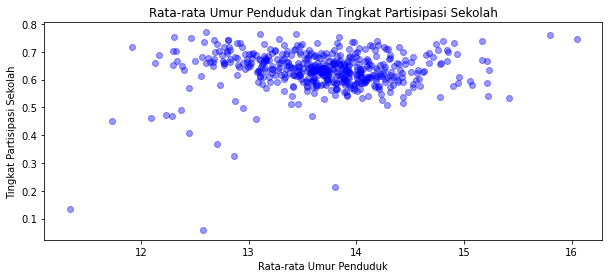

In [285]:
# Umur Penduduk
x_pce = df_grouped["UMUR"]
y_pce = df_grouped["school_participation"]

# Plot
plt.scatter(x_pce, y_pce, alpha=0.4, c='blue')
plt.title('Rata-rata Umur Penduduk dan Tingkat Partisipasi Sekolah')
plt.xlabel('Rata-rata Umur Penduduk')
plt.ylabel('Tingkat Partisipasi Sekolah')
plt.rcParams['figure.figsize'] = [7,7]
plt.show()

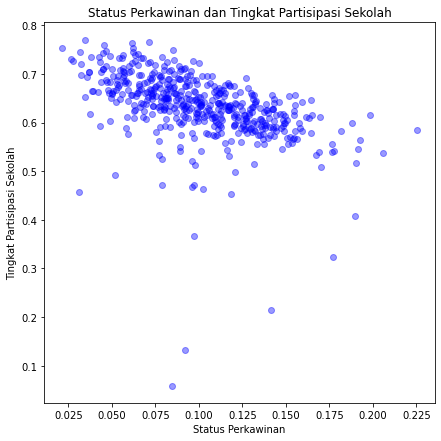

In [286]:
# Status Perkawinan
x_pce = df_grouped["married"]
y_pce = df_grouped["school_participation"]

# Plot
plt.scatter(x_pce, y_pce, alpha=0.4, c='blue')
plt.title('Status Perkawinan dan Tingkat Partisipasi Sekolah')
plt.xlabel('Status Perkawinan')
plt.ylabel('Tingkat Partisipasi Sekolah')
plt.rcParams['figure.figsize'] = [7,7]
plt.show()

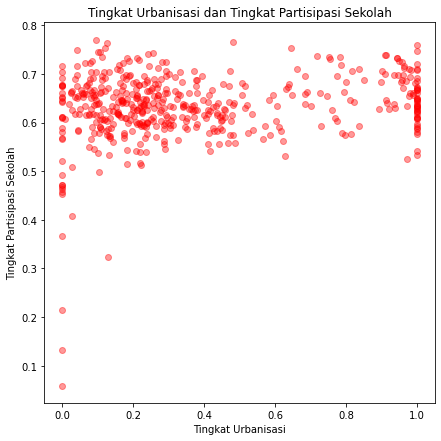

In [287]:
# Urbanisasi
x_pce = df_grouped["urban"]
y_pce = df_grouped["school_participation"]

# Plot
plt.scatter(x_pce, y_pce, alpha=0.4, c='red')
plt.title('Tingkat Urbanisasi dan Tingkat Partisipasi Sekolah')
plt.xlabel('Tingkat Urbanisasi')
plt.ylabel('Tingkat Partisipasi Sekolah')
plt.rcParams['figure.figsize'] = [7,7]
plt.show()

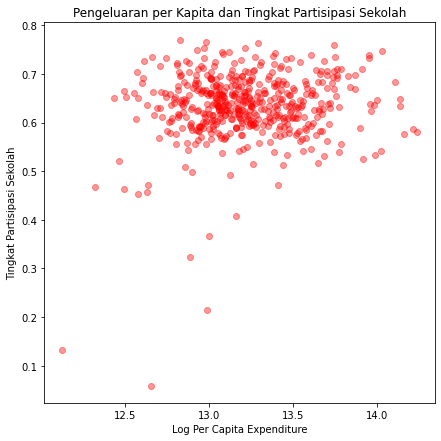

In [288]:
# Log Pengeluaran per Kapita
x_pce = df_grouped["log_exp_cap"]
y_pce = df_grouped["school_participation"]

# Plot
plt.scatter(x_pce, y_pce, alpha=0.4, c='red')
plt.title('Pengeluaran per Kapita dan Tingkat Partisipasi Sekolah')
plt.xlabel('Log Per Capita Expenditure')
plt.ylabel('Tingkat Partisipasi Sekolah')
plt.rcParams['figure.figsize'] = [7,7]
plt.show()